<a href="https://colab.research.google.com/github/sumankmaiti/All-in-one/blob/main/cnn_visualize_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


(186, 271, 3)


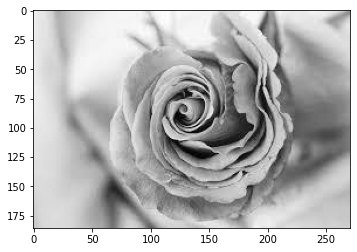

In [ ]:
# importing libraries.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# storing image path
fname = r'blackandwhite.jpeg'
  
# opening image using pil
image = Image.open(fname)
  
# plottingimage
a = np.array(image)

plt.imshow(a)
print(a.shape)
# plt.show()
# single_image="blackandwhite.jpg"
# single_image[0].shape
# single_image=single_image[0].reshape(1, 28, 28)
# plt.imshow(single_image[0].reshape(28, 28), cmap="gray")

get dataset

In [ ]:
import gzip
import numpy as np

def extract_data(filename, num_images, IMAGE_WIDTH):
    '''
    Extract images by reading the file bytestream. Reshape the read values into a 3D matrix of dimensions [m, h, w], where m 
    is the number of training examples.
    '''
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    '''
    Extract label into vector of integer values of dimensions [m, 1], where m is the number of images.
    '''
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz
(50000, 784)
(50000, 1)


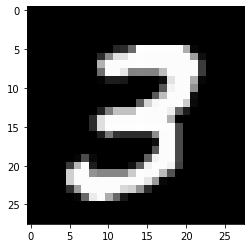

In [ ]:
 # training data
import matplotlib.pyplot as plt

samples =50000
X = extract_data('train-images-idx3-ubyte.gz', samples, 28)
y_dash = extract_labels('train-labels-idx1-ubyte.gz', samples).reshape(samples, 1)
print(X.shape)
print(y_dash.shape)
z = X[100].reshape(28,28)
# for rows in z:
#   print(6)
plt.imshow(X[7].reshape(28,28), cmap="gray")

In [ ]:
 # zero centering
X-= int(np.mean(X))
X/= int(np.std(X))
train_data = np.hstack((X,y_dash))  # attach lavel with input
print(train_data.shape)
# plt.imshow(X[100].reshape(28,28))

(50000, 785)


In [ ]:
num_classes = 10
number_of_filter_in_1st_conv= 5; number_of_filter_in_2nd_conv = 8
img_dim = 28; channels = 1; karnel = 3

initialize parameters

In [ ]:
 ## Initializing all the parameters
size_of_1st_conv= (number_of_filter_in_1st_conv, karnel, karnel)
size_of_2nd_conv= (number_of_filter_in_2nd_conv, karnel, karnel)
size_of_1st_dense= (128, 200)
size_of_2nd_dense= (10, 128)
print("1st convolution layer feature:", size_of_1st_conv)
print("2nd convolution layer feature:", size_of_2nd_conv)
print("3rd dense layer feature:", size_of_1st_dense)
print("4th dense layer feature:", size_of_2nd_dense)

1st convolution layer feature: (5, 3, 3)
2nd convolution layer feature: (8, 3, 3)
3rd dense layer feature: (128, 200)
4th dense layer feature: (10, 128)


In [ ]:
def initializeFilter(size, scale = 1.0):
    return np.random.normal(loc = 0, scale = 1.0, size = size)

def initializeWeight(size):
    return np.random.standard_normal(size=size) * 0.01

In [ ]:
feature_of_1st_conv = initializeFilter(size_of_1st_conv)
feature_of_2nd_conv = initializeFilter(size_of_2nd_conv)
weight_of_1st_dense = initializeWeight(size_of_1st_dense)
weight_of_2nd_dense = initializeWeight(size_of_2nd_dense)
print("Random initialization of 1st convolution layer feature:\n", feature_of_1st_conv)
# print("Random initialization of 2nd convolution layer feature:\n", feature_of_2nd_conv)
# print("Random initialization of 3rd dense layer feature:\n", weight_of_1st_dense)
# print("Random initialization of 2nd dense layer feature:\n", weight_of_2nd_dense)

Random initialization of 1st convolution layer feature:
 [[[-0.61005837 -0.82228475 -0.0458547 ]
  [-0.59949125 -0.0569207   0.36896397]
  [-0.03430952 -0.94675242 -0.32621053]]

 [[-0.9282208   0.9515817   1.30766875]
  [ 0.70470012  0.88919299  0.0567266 ]
  [ 0.42130656 -0.76201726 -0.3339698 ]]

 [[-0.26277818 -1.55695862 -0.87916634]
  [ 1.35780271  0.32745282  0.13142281]
  [-0.58334649 -0.30745305  0.46014295]]

 [[-1.65856332  1.31473809  0.66611093]
  [-0.70492461 -0.7889937  -0.49744535]
  [ 1.74017752  1.07524063  1.44752845]]

 [[ 0.722876   -0.576409    0.22902611]
  [-2.65605509  0.61068859  0.78452758]
  [ 0.43571061 -0.68541793  0.26069319]]]


In [ ]:
b1 = np.zeros((feature_of_1st_conv.shape[0],1))
b2 = np.zeros((feature_of_2nd_conv.shape[0],1))
b3 = np.zeros((weight_of_1st_dense.shape[0],1))
b4 = np.zeros((weight_of_2nd_dense.shape[0],1))
# print("Random initialization of 1st convolution layer bias:\n", b1)
# print("Random initialization of 2nd convolution layer bias:\n", b2)
# print("Random initialization of 3rd dense layer weight:\n", b3)
# print("Random initialization of 2nd dense layer weight:\n", b4)


In [ ]:
lr = 0.01; beta1 = 0.95; beta2 = 0.99
batch_size = 4; num_epochs = 2
save_path = 'params.pkl'

# train_data = np.hstack((X,y_dash))  # attach lavel with input
np.random.shuffle(train_data)
batches = [train_data[k:k + batch_size] for k in range(0, train_data.shape[0], batch_size)]
print("total no of batches:", len(batches))
print(batches[1].shape)
z=batches[1][:,:-1]
# print(z[1].reshape(28, 28))
# plt.imshow(z[1].reshape(28, 28))

total no of batches: 12500
(4, 785)


single batch from dataset

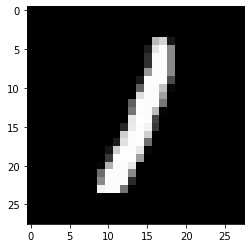

In [ ]:
single_image=batches[28][:,:-1]
single_image[0].shape
single_image=single_image[0].reshape(1, 28, 28)
plt.imshow(single_image[0].reshape(28, 28), cmap="gray")

random features

before convolution random features:


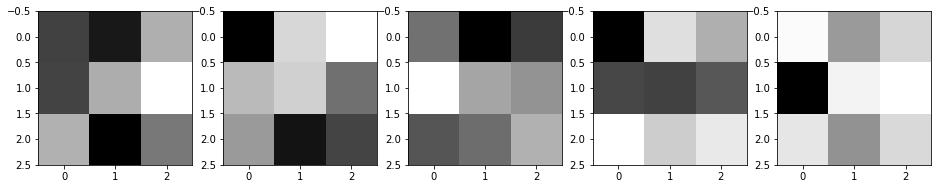

In [ ]:
import matplotlib.pyplot as plt
print("before convolution random features:",)
columns = 5
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = feature_of_1st_conv[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()
# plt.imshow(feature_of_1st_conv[1], feature_of_1st_conv[2], axis="off")

1st convolution

In [ ]:
import numpy as np
#####################################################
################ Forward Operations #################
#####################################################

def convolution(image, filter, bias, stride=1):
    '''
    Confolves `filter` over `image` using `stride`
    '''
    # (no_of_filter, karnel, f, _) = filter.shape # filter dimensions
    (no_of_filter, karnel, _) = filter.shape # filter dimensions
    (n_c, in_dim, _) = image.shape # image dimensions
    print("before convolution input shape", image.shape )
    print("Convolution layer filter shape:", filter.shape)
    
    out_dim = int((in_dim - karnel)/stride)+1 # calculate output dimensions
    # print(out_dim)
    # assert n_c == n_c_f, "Dimensions of filter must match dimensions of input image"
    
    out = np.zeros((no_of_filter, out_dim, out_dim))
    print(out.shape)
    
    # convolve the filter over every part of the image, adding the bias at each step. 
    for curr_filter in range(no_of_filter):
        curr_y = out_y_fmap = 0
        while curr_y + karnel <= in_dim:
            curr_x = out_x_fmap = 0
            while curr_x + karnel <= in_dim:
                out[curr_filter, out_y_fmap, out_x_fmap] = np.sum(filter[curr_filter] * image[:,curr_y:curr_y+karnel, curr_x:curr_x+karnel]) + bias[curr_filter]
                curr_x += stride
                out_x_fmap += 1
            curr_y += stride
            out_y_fmap += 1
    
    return out


In [ ]:
output = convolution(single_image, feature_of_1st_conv, b1, stride=1)
print("after convolution feature map shape:",output.shape)

before convolution input shape (1, 28, 28)
Convolution layer filter shape: (5, 3, 3)
(5, 26, 26)
after convolution feature map shape: (5, 26, 26)


after convolution feature maps:


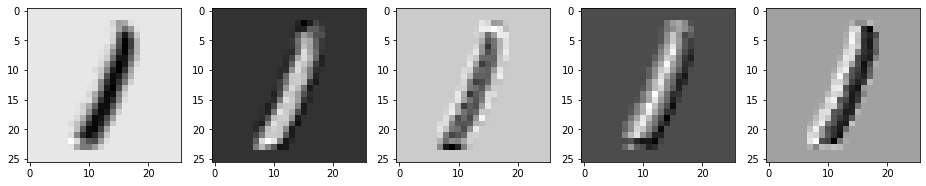

In [ ]:
print("after convolution feature maps:")
columns = 5
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = output[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()

ReLU after convolution


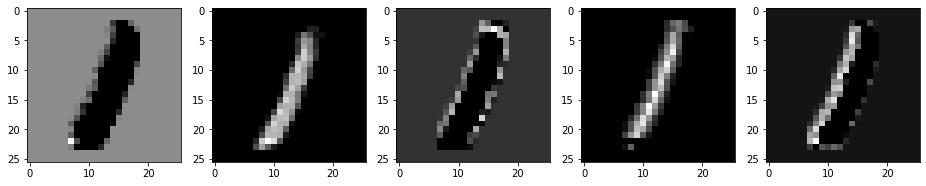

In [ ]:
print("ReLU after convolution")
filt, dimension,_ = output.shape
relu_output = np.zeros((filt, dimension, dimension))
for item in range(filt):
  relu_output[item] = np.maximum(0, output[item]) # pass through ReLU non-linearity
columns = 5
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = relu_output[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()

Leacky ReLU after convolution


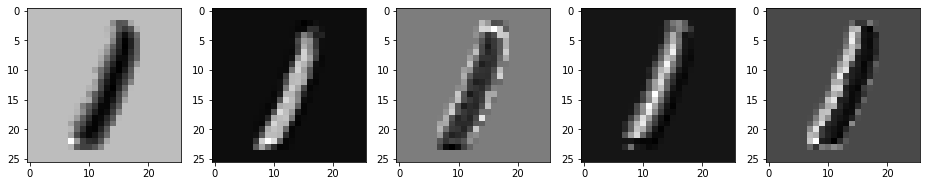

In [ ]:
print("Leacky ReLU after convolution")
filt, dimension,_ = output.shape
lrelu_output = np.zeros((filt, dimension, dimension))
for item in range(filt):
  lrelu_output[item] = np.maximum(0.2*output[item], output[item]) # pass through ReLU non-linearity
columns = 5
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = lrelu_output[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()

sigmoid after convolution


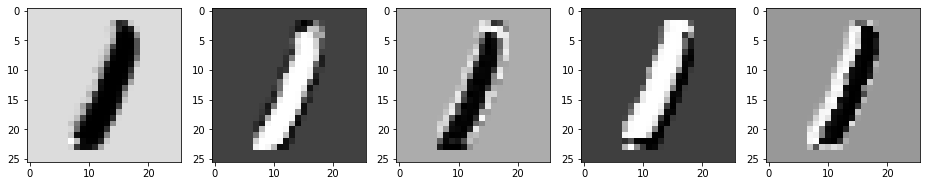

In [ ]:
print("sigmoid after convolution")
filt, dimension,_ = output.shape
sigmoid_output = np.zeros((filt, dimension, dimension))
for item in range(filt):
  sigmoid_output[item] = 1/(1 + np.exp(-output[item])) # pass through ReLU non-linearity
columns = 5
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = sigmoid_output[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()

1st max pooling

In [ ]:
def maxpool(image, karnel=2, stride=2):
    '''
    Downsample `image` using kernel size `f` and stride `s`
    '''
    no_of_feature_map, h_prev, w_prev = image.shape
    
    h = int((h_prev - karnel)/stride)+1
    w = int((w_prev - karnel)/stride)+1
    print("before max pooling filter shape:", image.shape)

    downsampled = np.zeros((no_of_feature_map, h, w))
    
    for i in range(no_of_feature_map):
        # slide maxpool window over each part of the image and assign the max value at each step to the output
        curr_y = out_y = 0
        while curr_y + karnel <= h_prev:
            curr_x = out_x = 0
            while curr_x + karnel <= w_prev:
                downsampled[i, out_y, out_x] = np.max(image[i, curr_y:curr_y+karnel, curr_x:curr_x+karnel])
                curr_x += stride
                out_x += 1
            curr_y += stride
            out_y += 1
    return downsampled

In [ ]:
downsampled = maxpool(lrelu_output, karnel=2, stride=2)
print("after max pooling filter shape:",downsampled.shape)

before max pooling filter shape: (5, 26, 26)
after max pooling filter shape: (5, 13, 13)


after max pooling feature maps:


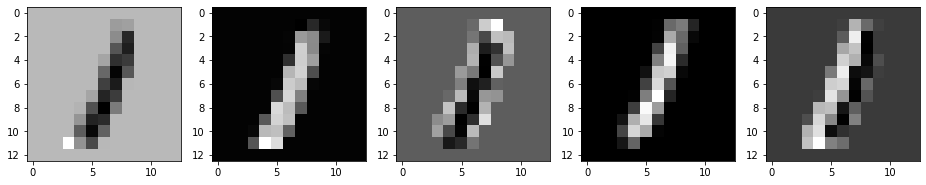

In [ ]:
print("after max pooling feature maps:")
columns = 5
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = downsampled[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
def avgpool(image, karnel=2, stride=2):
    '''
    Downsample `image` using kernel size `f` and stride `s`
    '''
    no_of_feature_map, h_prev, w_prev = image.shape
    
    h = int((h_prev - karnel)/stride)+1
    w = int((w_prev - karnel)/stride)+1
    print("before max pooling filter shape:", image.shape)

    downsampled = np.zeros((no_of_feature_map, h, w))
    
    for i in range(no_of_feature_map):
        # slide maxpool window over each part of the image and assign the max value at each step to the output
        curr_y = out_y = 0
        while curr_y + karnel <= h_prev:
            curr_x = out_x = 0
            while curr_x + karnel <= w_prev:
                downsampled[i, out_y, out_x] = np.average(image[i, curr_y:curr_y+karnel, curr_x:curr_x+karnel])
                curr_x += stride
                out_x += 1
            curr_y += stride
            out_y += 1
    return downsampled

In [ ]:
downsampled = avgpool(lrelu_output, karnel=2, stride=2)
print("after max pooling filter shape:",downsampled.shape)

before max pooling filter shape: (5, 26, 26)
after max pooling filter shape: (5, 13, 13)


after avg pooling feature maps:


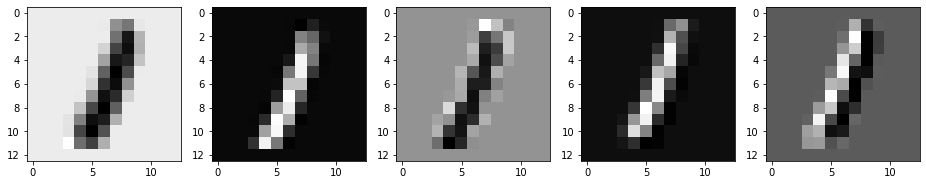

In [ ]:
print("after avg pooling feature maps:")
columns = 5
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = downsampled[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
def minpool(image, karnel=2, stride=2):
    '''
    Downsample `image` using kernel size `f` and stride `s`
    '''
    no_of_feature_map, h_prev, w_prev = image.shape
    
    h = int((h_prev - karnel)/stride)+1
    w = int((w_prev - karnel)/stride)+1
    print("before max pooling filter shape:", image.shape)

    downsampled = np.zeros((no_of_feature_map, h, w))
    
    for i in range(no_of_feature_map):
        # slide maxpool window over each part of the image and assign the max value at each step to the output
        curr_y = out_y = 0
        while curr_y + karnel <= h_prev:
            curr_x = out_x = 0
            while curr_x + karnel <= w_prev:
                downsampled[i, out_y, out_x] = np.min(image[i, curr_y:curr_y+karnel, curr_x:curr_x+karnel])
                curr_x += stride
                out_x += 1
            curr_y += stride
            out_y += 1
    return downsampled

In [ ]:
downsampled = minpool(lrelu_output, karnel=2, stride=2)
print("after max pooling filter shape:",downsampled.shape)

before max pooling filter shape: (5, 26, 26)
after max pooling filter shape: (5, 13, 13)


after min pooling feature maps:


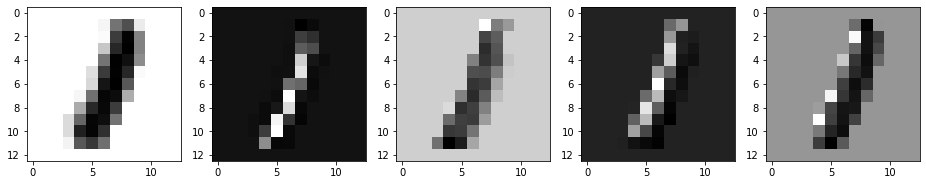

In [ ]:
print("after min pooling feature maps:")
columns = 5
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = downsampled[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()

2nd convolution

In [ ]:
output2 = convolution(downsampled, feature_of_2nd_conv, b2, stride=1)
print("after convolution feature map shape:",output2.shape)

before convolution input shape (5, 13, 13)
Convolution layer filter shape: (8, 3, 3)
(8, 11, 11)
after convolution feature map shape: (8, 11, 11)


after 2nd convolution feature maps:


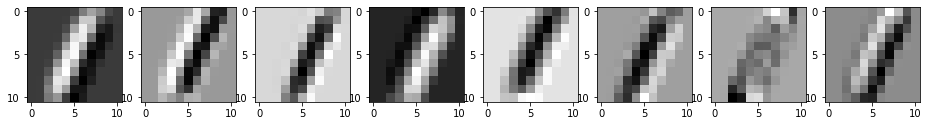

In [ ]:
print("after 2nd convolution feature maps:")
columns = 8
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = output2[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()

LReLU after convolution


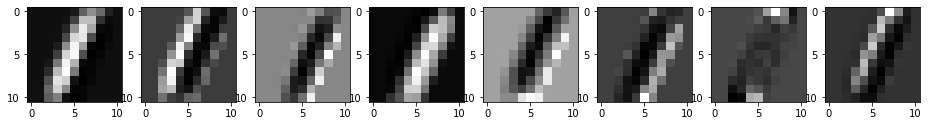

In [ ]:
print("LReLU after convolution")
filt, dimension,_ = output2.shape
lrelu_output2 = np.zeros((filt, dimension, dimension))
for item in range(filt):
  lrelu_output2[item] = np.maximum(0.2*output2[item], output2[item])
columns = 8
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = lrelu_output2[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()

2nd max pooling

In [ ]:
downsampled2 = maxpool(lrelu_output2, karnel=2, stride=2)
print("after max pooling filter shape:",downsampled2.shape)

before max pooling filter shape: (8, 11, 11)
after max pooling filter shape: (8, 5, 5)


after 2nd max pooling feature maps:


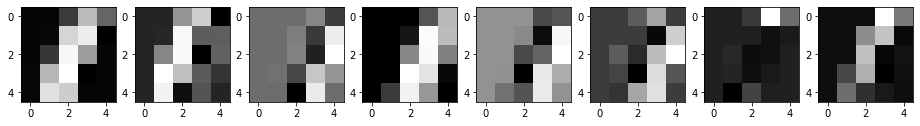

In [ ]:
print("after 2nd max pooling feature maps:")
columns = 8
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = downsampled2[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
plt.show()

Dense

In [ ]:
def softmax(X):
    out = np.exp(X)
    return out/np.sum(out)

In [ ]:
(no_of_feature2, dim2, _) = downsampled2.shape
print("before flattning:", downsampled2.shape)
total_neurons = downsampled2.reshape((no_of_feature2 * dim2 * dim2, 1)) # flatten pooled layer

print("no. of weights in 1st dense:", weight_of_1st_dense.shape, "after flattning features:", total_neurons.shape)
# print("no. of weights:\n", weight_of_1st_dense, "\nafter flattning:\n", total_neurons)
z = weight_of_1st_dense.dot(total_neurons) + b3 # first dense layer
z[z<=0] = 0 # pass through ReLU non-linearity
print("After weighted sum and relu:", z.shape)

print("no. of weights in 2nd dense:", weight_of_2nd_dense.shape)
      
final_output = weight_of_2nd_dense.dot(z) + b4 # second dense layer
print("After weighted sum:", final_output.shape)
probs = softmax(final_output) # predict class probabilities with the softmax activation function
print("probablities:\n", probs)

before flattning: (8, 5, 5)
no. of weights in 1st dense: (128, 200) after flattning features: (200, 1)
After weighted sum and relu: (128, 1)
no. of weights in 2nd dense: (10, 128)
After weighted sum: (10, 1)
probablities:
 [[0.0862303 ]
 [0.04255332]
 [0.12033241]
 [0.12919047]
 [0.03505602]
 [0.09674346]
 [0.07244958]
 [0.29278786]
 [0.06356282]
 [0.06109375]]


loss

In [ ]:
def categoricalCrossEntropy(probs, label):
    return -np.sum(label * np.log(probs))

In [ ]:
################################################
#################### Loss ######################
################################################
single_image_label=batches[0][:,-1:]
print("class: ", single_image_label[0])
label = np.eye(10)[int(single_image_label[0])].reshape(10, 1) # convert label to one-hot
# print("after one hot encoding:", label)
loss = categoricalCrossEntropy(probs, label) # categorical cross-entropy loss
print("loss: ",loss)

class:  [0.]
loss:  2.189977508920498


Back propagation of fully connected layer

In [ ]:
# ################################################
# ############# Backward Operation ###############
# ################################################
dout = probs - label # derivative of loss w.r.t. final dense layer output
print("dout shape :", dout.shape)
print("z shape :", z.shape)
dw4 = dout.dot(z.T) # loss gradient of final dense layer weights
print("dw4 s:", dw4.shape)
db4 = np.sum(dout, axis = 1).reshape(b4.shape) # loss gradient of final dense layer biases
print("db4:", db4.shape)

dz = weight_of_2nd_dense.T.dot(dout) # loss gradient of first dense layer outputs 
print("dz", dz.shape)
dz[z<=0] = 0 # backpropagate through ReLU 
dw3 = dz.dot(total_neurons.T)
db3 = np.sum(dz, axis = 1).reshape(b3.shape)
print("dw3, db3:", dw3.shape, db3.shape)
dfc = weight_of_1st_dense.T.dot(dz) # loss gradients of fully-connected layer (pooling layer)
print("dfc:", dfc.shape)

dout shape : (10, 1)
z shape : (128, 1)
dw4 s: (10, 128)
db4: (10, 1)
dz (128, 1)
dw3, db3: (128, 200) (128, 1)
dfc: (200, 1)


back propagation of 2nd maxpooling layer

In [ ]:
def nanargmax(arr):
    idx = np.nanargmax(arr)
    idxs = np.unravel_index(idx, arr.shape)
    return idxs  

In [ ]:

def maxpoolBackward(dpool, orig, karnel, stride):
    '''
    Backpropagation through a maxpooling layer. The gradients are passed through the indices of greatest value in the original maxpooling during the forward step.
    '''
    (n_c, orig_dim, _) = orig.shape
    
    dout = np.zeros(orig.shape)
    
    for curr_c in range(n_c):
        curr_y = out_y = 0
        while curr_y + karnel <= orig_dim:
            curr_x = out_x = 0
            while curr_x + karnel <= orig_dim:
                # obtain index of largest value in input for current window
                (a, b) = nanargmax(orig[curr_c, curr_y:curr_y+karnel, curr_x:curr_x+karnel])
                dout[curr_c, curr_y+a, curr_x+b] = dpool[curr_c, out_y, out_x]
                
                curr_x += stride
                out_x += 1
            curr_y += stride
            out_y += 1
        
    return dout

In [ ]:
dpool2 = dfc.reshape(downsampled2.shape) # reshape fully connected into dimensions of pooling layer
print("2nd pool layer shape:", dpool2.shape)
dconv2 = maxpoolBackward(dpool2, output2, 2, 2) # backprop through the max-pooling layer(only neurons with highest activation in window get updated)
dconv2[output2<=0] = 0 # backpropagate through ReLU
print("after back propagation of 2nd pooling layer: 2nd conv layer feature map shape: ", dconv2.shape)

2nd pool layer shape: (8, 5, 5)
after back propagation of 2nd pooling layer: 2nd conv layer feature map shape:  (8, 11, 11)


dpool2:


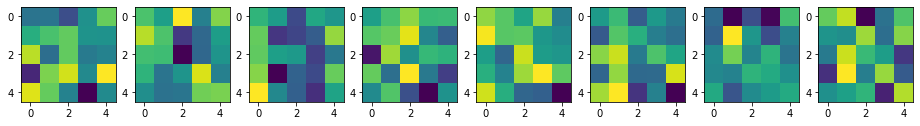

In [ ]:
print("dpool2:")
columns = 8
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = dpool2[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

dconv2:


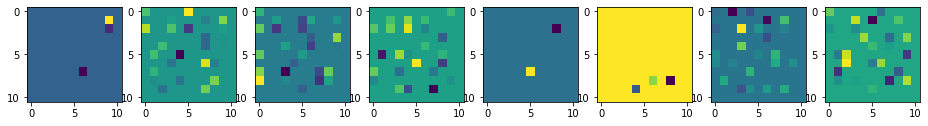

In [ ]:
print("dconv2:")
columns = 8
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = dconv2[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

baack propagation of 2nd convolution layer

In [ ]:
def convolutionBackward(dconv_prev, conv_in, filt, s):
    '''
    Backpropagation through a convolutional layer. 
    '''
    (n_f, f, _) = filt.shape
    (_, orig_dim, _) = conv_in.shape
    ## initialize derivatives
    dout = np.zeros(conv_in.shape) 
    dfilt = np.zeros(filt.shape)
    dbias = np.zeros((n_f,1))
    for curr_f in range(n_f):
        # loop through all filters
        curr_y = out_y = 1
        while curr_y + f <= orig_dim:
            curr_x = out_x = 1
            while curr_x + f <= orig_dim:
                # loss gradient of filter (used to update the filter)
                dfilt[curr_f] += sum(dconv_prev[curr_f, out_y, out_x] * conv_in[:, curr_y:curr_y+f, curr_x:curr_x+f])
                # loss gradient of the input to the convolution operation (conv1 in the case of this network)
                dout[:, curr_y:curr_y+f, curr_x:curr_x+f] += dconv_prev[curr_f, out_y, out_x] * filt[curr_f] 
                curr_x += s
                out_x += 1
            curr_y += s
            out_y += 1
        # loss gradient of the bias
        dbias[curr_f] = np.sum(dconv_prev[curr_f])
    
    return dout, dfilt, dbias

In [ ]:
print("before backpropagation of 2nd conv layer feature map of 2nd conv layer shape:",dconv2.shape)
dpool1, df2, db2 = convolutionBackward(dconv2, downsampled, feature_of_2nd_conv, 1) # backpropagate previous gradient through second convolutional layer.
print("after back propagation of 2nd conv layer: pool 1 size:", dpool1.shape, "2nd conv layer feature size: ", df2.shape, "2nd conv layer bias size: ", db2.shape)

before backpropagation of 2nd conv layer feature map of 2nd conv layer shape: (8, 11, 11)
after back propagation of 2nd conv layer: pool 1 size: (4, 13, 13) 2nd conv layer feature size:  (8, 3, 3) 2nd conv layer bias size:  (8, 1)


back propagation of 1st max pooling layer

In [ ]:
dconv1 = maxpoolBackward(dpool1, output, 2, 2) # backprop through the max-pooling layer(only neurons with highest activation in window get updated)
dconv1[output<=0] = 0 # backpropagate through ReLU
print("after back propagation of pool: 1st conv layer shape: ", dconv1.shape)

after back propagation of pool: 1st conv layer shape:  (4, 26, 26)


conv1:


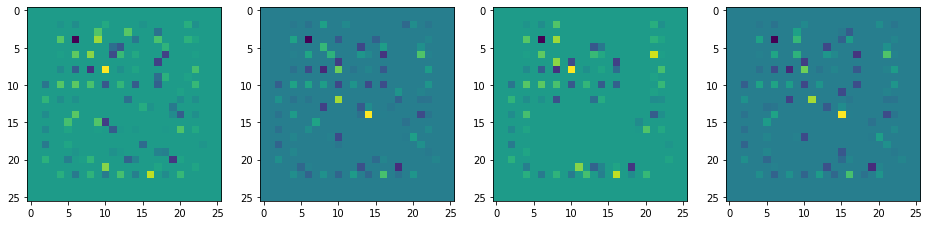

In [ ]:
print("conv1:")
columns = 4
rows = 1
fig = plt.figure(figsize=(16,16))
for i in range(1, columns*rows + 1):
    img = dconv1[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

back propagation of 1st conv layer

In [ ]:
print("before backpropagation of 1st conv layer feature map shape:",dconv1.shape)
dimage, df1, db1 = convolutionBackward(dconv1, single_image, feature_of_1st_conv, 1) # backpropagate previous gradient through second convolutional layer.
print("after back propagation: original image size size:", dimage.shape, "2nd conv layer feature size: ", df1.shape, "2nd conv layer bias size: ", db1.shape)

before backpropagation of 1st conv layer feature map shape: (4, 26, 26)
after back propagation: original image size size: (1, 28, 28) 2nd conv layer feature size:  (4, 3, 3) 2nd conv layer bias size:  (4, 1)


update weights

In [ ]:
print("before parameter update:")
print(feature_of_1st_conv)

before parameter update:
[[[ 1.37731153 -1.0214669   0.07413938]
  [-0.86406612  0.57669619  0.5578184 ]
  [-0.76453386 -0.29487686 -0.02033897]]

 [[-1.29683875 -0.55038351  0.50293307]
  [-1.80052647  0.28303028 -0.64503912]
  [ 1.24574916  0.37259722 -0.49222745]]

 [[-0.52344068 -0.32010898 -0.71797265]
  [-0.44813158 -0.48775416 -0.59810803]
  [-1.02388745 -1.17996527 -0.15159339]]

 [[-1.07733825 -0.230431    0.80718831]
  [-0.63534131 -1.39913642  0.33530747]
  [ 0.51381256 -1.202393    0.78792534]]]


In [ ]:
 # initialize gradients and momentum,RMS params
idf1 = np.zeros(feature_of_1st_conv.shape)
idf2 = np.zeros(feature_of_2nd_conv.shape)
idw3 = np.zeros(weight_of_1st_dense.shape)
idw4 = np.zeros(weight_of_2nd_dense.shape)
idb1 = np.zeros(b1.shape)
idb2 = np.zeros(b2.shape)
idb3 = np.zeros(b3.shape)
idb4 = np.zeros(b4.shape)

v1 = np.zeros(feature_of_1st_conv.shape)
v2 = np.zeros(feature_of_2nd_conv.shape)
v3 = np.zeros(weight_of_1st_dense.shape)
v4 = np.zeros(weight_of_2nd_dense.shape)
bv1 = np.zeros(b1.shape)
bv2 = np.zeros(b2.shape)
bv3 = np.zeros(b3.shape)
bv4 = np.zeros(b4.shape)

s1 = np.zeros(feature_of_1st_conv.shape)
s2 = np.zeros(feature_of_2nd_conv.shape)
s3 = np.zeros(weight_of_1st_dense.shape)
s4 = np.zeros(weight_of_2nd_dense.shape)
bs1 = np.zeros(b1.shape)
bs2 = np.zeros(b2.shape)
bs3 = np.zeros(b3.shape)
bs4 = np.zeros(b4.shape)
    
df1+=df1
db1+=db1
df2+=df2
db2+=db2
dw3+=dw3
db3+=db3
dw4+=dw4
db4+=db4

# Parameter Update  
    
v1 = beta1*v1 + (1-beta1)*df1/1 # momentum update
s1 = beta2*s1 + (1-beta2)*(df1/1)**2 # RMSProp update
feature_of_1st_conv -= lr * v1/np.sqrt(s1+1e-7) # combine momentum and RMSProp to perform update with Adam

bv1 = beta1*bv1 + (1-beta1)*db1/1
bs1 = beta2*bs1 + (1-beta2)*(db1/1)**2
b1 -= lr * bv1/np.sqrt(bs1+1e-7)

v2 = beta1*v2 + (1-beta1)*df2/1
s2 = beta2*s2 + (1-beta2)*(df2/1)**2
feature_of_2nd_conv -= lr * v2/np.sqrt(s2+1e-7)
                    
bv2 = beta1*bv2 + (1-beta1) * db2/1
bs2 = beta2*bs2 + (1-beta2)*(db2/1)**2
b2 -= lr * bv2/np.sqrt(bs2+1e-7)

v3 = beta1*v3 + (1-beta1) * dw3/1
s3 = beta2*s3 + (1-beta2)*(dw3/1)**2
weight_of_1st_dense -= lr * v3/np.sqrt(s3+1e-7)

bv3 = beta1*bv3 + (1-beta1) * db3/1
bs3 = beta2*bs3 + (1-beta2)*(db3/1)**2
b3 -= lr * bv3/np.sqrt(bs3+1e-7)

v4 = beta1*v4 + (1-beta1) * dw4/1
s4 = beta2*s4 + (1-beta2)*(dw4/1)**2
weight_of_2nd_dense -= lr * v4 / np.sqrt(s4+1e-7)

bv4 = beta1*bv4 + (1-beta1)*db4/1
bs4 = beta2*bs4 + (1-beta2)*(db4/1)**2
b4 -= lr * bv4 / np.sqrt(bs4+1e-7)

In [ ]:
print("after parameter update:")
print(feature_of_1st_conv)

after parameter update:
[[[ 1.38230957 -1.01647131  0.07913538]
  [-0.85909207  0.58168674  0.56281476]
  [-0.76937209 -0.29089967 -0.01536611]]

 [[-1.29776886 -0.5500884   0.50762915]
  [-1.79991198  0.28758686 -0.64111069]
  [ 1.24075844  0.36763329 -0.49711067]]

 [[-0.52838614 -0.3248793  -0.71366306]
  [-0.4530117  -0.49250851 -0.60302713]
  [-1.02876096 -1.18196202 -0.14786341]]

 [[-1.07237664 -0.22544337  0.81218264]
  [-0.63963039 -1.40391946  0.33035096]
  [ 0.50882069 -1.20737972  0.78300717]]]
